## Sequence Models
It's important to really take words, and compute embeddings for them, but the relative ordering, the sequence of words matters too for the meaning of a sentence, and if you jumble the words around, that changes, or destroys the meaning of a sentence. 

If you take just a very simple sentence, like my dog sat on my hat, and you swap the words dog, and hat, you're now changing from a sentence that has some kind of meaning, and some semantics, to a ridiculous sentence that has no meaning. So when we were doing classification based on embeddings, it was very nice that we had words with similar meanings, labels in a particular way, so that we could say okay, this is a positive review, and I got a bunch of vectors that are similar, this is a negative review, and I got these vectors in a similar way, but ordering those then gives us that whole extra layer of meaning that'll help us to understand the sentence rather than just a simple classification.

So for a neural network, to take into account the ordering of the words, people now use specialized Neural Network Architectures, things like an RNN, or GIO, or LSTM, and you see what all these terms mean, and a little bit, in order for these Specialized Neural Networks to process natural language. Yeah. So like something like an RNN, it's really interesting that, the context is preserved from timestamp to timestamp, which can be really useful, but that might get lost in longer sentences, and that's why I really love LSTMs because LSTMs have that cell state, and the cell state are almost like a conveyor belts carrying contexts all the way down, for a long way down timestamp. 

It's like you could say, okay the context from speak, means that it's a language, but you have to go all the way back to the beginning of the sentence to see that it's Ireland, and then in Ireland, I would learn how to speak. You speak Gaelic. Really badly. Since we learn to infant all of these things. Let's go on to the next video.

Take a look to the next sentence. I lived in Ireland so at school they made me learn how to speak something. How would you finish that sentence? Well, you might say Irish but you'd be much more accurate if you said, I lived in Ireland so at school they made me learn how to speak Gaelic. First of course, is the syntactic issue. Irish describes the people, Gaelic describes the language. But more importantly in the ML context is the key word that gives us the details about the language. That's the word Ireland, which appears much earlier in the sentence. So, if we're looking at a sequence of words we might lose that context. With that in mind an update to RNNs is called LSTM, long short - term memory has been created. In addition to the context being PaaSed as it is in RNNs, LSTMs have an additional pipeline of contexts called cell state. This can pass through the network to impact it.<br> 
We can stack LSTM layers like any other layers, but when we do this we have to specify the `return_sequences=True` in the first one. This ensures the output from the LSTM matches the input of the next one.

```python
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), # number of outputs 64
    tf.keras.layers.Dense(64, acitvation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

```
We can also substitue the `Faltten` and `GlobalAveragePooling1D` layers from a normal Embedding NN for an LSTM

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request

vocab_size = 10000
embeddin_dim = 16
max_lenght = 32
trunc_type = 'post'
padding_type = 'post'
oov_token = '<OOV>'
# total of 27000 records
training_size = 20000

#url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json'
#file_name = 'sarcasm.json'
#urllib.request.urlretrieve(url, file_name)

In [2]:
# Load the datasets
with open('sarcasm.json', 'r') as f:
    datastore = json.load(f)
    
sentences = [] 
labels = []
urls = []
# getting the sentences, urls and labels
# its very easy cause it's in jason format

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])
    
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = np.array(labels[0:training_size])
testing_labels = np.array(labels[training_size:])

In [3]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

# convert to sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
# padd sequences
training_padded = pad_sequences(training_sequences, maxlen=max_lenght,
                                truncating=trunc_type, padding=padding_type)

# convert testing to sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, truncating=trunc_type,
                              maxlen=max_lenght, padding=padding_type)

### Training with LSTM layer

In [36]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.Embedding(vocab_size, embeddin_dim, input_length=max_lenght))
model_lstm.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
model_lstm.add(tf.keras.layers.Dense(units=24, activation='relu'))
model_lstm.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

epochs=10
history_lstm = model_lstm.fit(training_padded, training_labels, epochs=epochs,
                   validation_data=(testing_padded, testing_labels), verbose=2)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 32, 16)            160000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_20 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 25        
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 - 6s - loss: 0.4116 - accuracy: 0.7952 - val_loss: 0.3338 - val_accuracy: 0.8527
Epoch 2/10
625/625 - 5s - loss: 0.2233 - accuracy: 0.9089 - val_loss: 0.3472 - val_accuracy: 0.8514
Epoch 3/10
625/625 - 5s - loss: 0.1574 - accu

In [37]:
# Training with Convolution
# Adding 64 filters each for 3 words.

model_conv = tf.keras.Sequential()
model_conv.add(tf.keras.layers.Embedding(vocab_size, embeddin_dim, input_length=max_lenght))
model_conv.add(tf.keras.layers.Conv1D(filters=64, kernel_size=(5), activation = 'relu'))
model_conv.add(tf.keras.layers.GlobalMaxPool1D())
model_conv.add(tf.keras.layers.Dense(units=24, activation='relu'))
model_conv.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv.summary()

epochs=10
history_conv = model_conv.fit(training_padded, training_labels, epochs=epochs,
                   validation_data=(testing_padded, testing_labels), verbose=2)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 32, 16)            160000    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 28, 64)            5184      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 25        
Total params: 166,769
Trainable params: 166,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 - 2s - loss: 0.4471 - accuracy: 0.7763 - val_loss: 0.3630 - val_accuracy: 0.8404
Epoch 2/10
62

In [38]:
# Training with GRU
# Adding 64 filters each for 3 words.

model_gru = tf.keras.Sequential()
model_gru.add(tf.keras.layers.Embedding(vocab_size, embeddin_dim, input_length=max_lenght))
model_gru.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)))
model_gru.add(tf.keras.layers.Dense(units=24, activation='relu'))
model_gru.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

epochs=10
history_gru = model_gru.fit(training_padded, training_labels, epochs=epochs,
                   validation_data=(testing_padded, testing_labels), verbose=2)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 32, 16)            160000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_24 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 25        
Total params: 171,185
Trainable params: 171,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 - 6s - loss: 0.4067 - accuracy: 0.7972 - val_loss: 0.3252 - val_accuracy: 0.8563
Epoch 2/10
625/625 - 5s - loss: 0.2082 - accuracy: 0.9168 - val_loss: 0.3396 - val_accuracy: 0.8609
Epoch 3/10
625/625 - 5s - loss: 0.1229 - accu

In [42]:
import pandas as pd

In [43]:
def plot_model(history):
    
    history_df = pd.DataFrame(history.history, columns=['loss','accuracy','val_loss','val_accuracy'])
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14, 4))
    history_df[['loss','val_loss']].plot(ax=ax1, grid=True, title='Conv Loss', marker='*')
    history_df[['accuracy','val_accuracy']].plot(ax=ax2, grid=True, title='Conv Accuracy', marker='o')
    plt.tight_layout()

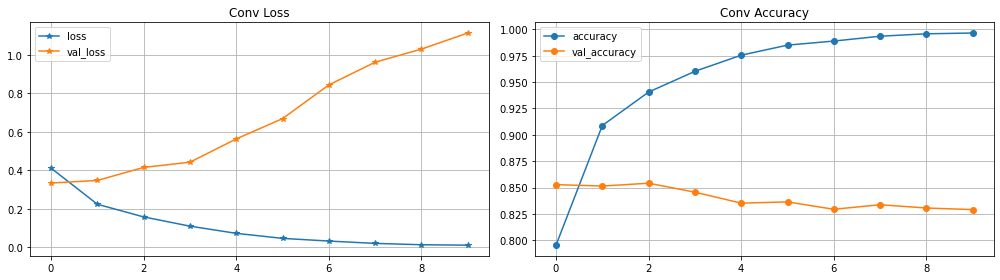

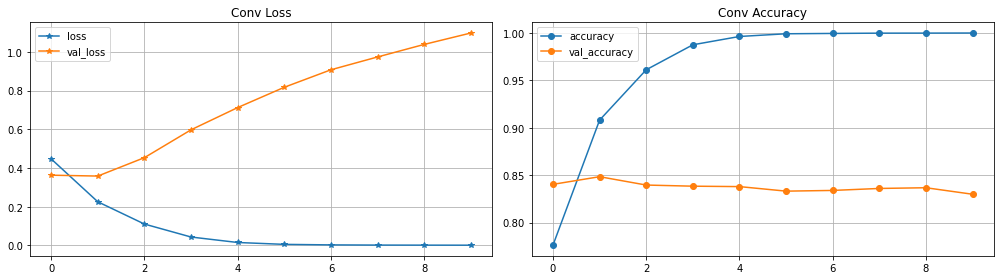

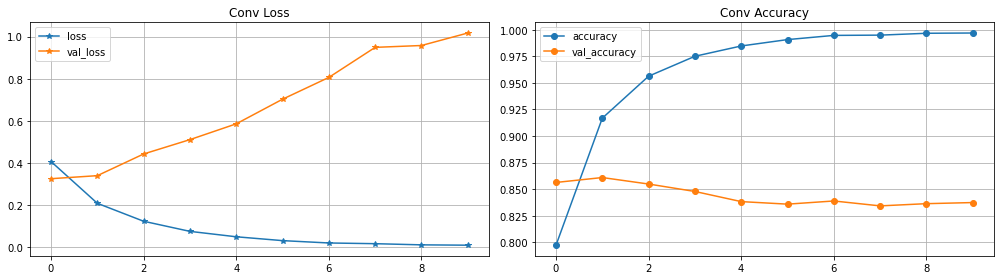

In [45]:
plot_model(history_lstm)
plot_model(history_conv)
plot_model(history_gru)

Remember that with text, you'll probably get a bit more overfitting than you would have done with images. Not least because you'll almost always have out of vocabulary words in the validation data set. That is words in the validation dataset that weren't present in the training, naturally leading to overfitting. These words can't be classified and, of course, you're going to have these overfitting issues,